In [1]:
import torch
import pygame
import pymunk
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pymunk.matplotlib_util
from pymunk.vec2d import Vec2d
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

Loading chipmunk for Linux (64bit) [/s/bach/j/under/dstrobel/.local/lib/python3.6/site-packages/pymunk/libchipmunk.so]


In [2]:
def rotate(vec, theta=90):
    v = np.array(vec)
    rot = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    return tuple(rot@v)

In [3]:
def gravity(a, b, G=6.674e-11):
    '''force of gravity attracting object b to object a '''
    aBody, aShape = a
    bBody, bShape = b
    distance = aBody.position - bBody.position
    direction = distance.normalized()
    magnitude = (G*aBody.mass*bBody.mass)/((distance.length)**2)
    return direction * magnitude

In [4]:
def circle(mass, radius, position):
    moment = pymunk.moment_for_circle(mass,0,radius,(0,0))
    body = pymunk.Body(mass,moment)
    shape = pymunk.Circle(body,radius)
    body.position=position
    body.start_position=Vec2d(position)
    return body,shape

<cdata 'cpSpaceDebugColor &' 0x55754af6ba6c>


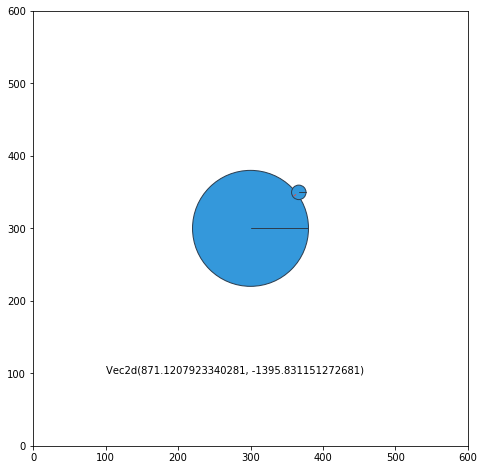

In [6]:
space = pymunk.Space()
space.gravity = 0,0
space.damping = 0.999


planet = circle((15e15), 80, (300,300))
ball = circle(10, 10, (0,300))

space.add(*planet)
space.add(*ball)

forces = []
f = 0
forces.append((ball[0],(gravity(planet,ball),(0,0))))
#force = (ball[0],((0,f),(0,0)))
rot90velnorm = Vec2d(rotate(ball[0].velocity)).normalized()
force = (ball[0], ((tuple(1000*rot90velnorm)),(0,0)))
forces.append(force)
#force[0].apply_impulse_at_local_point(*force[1])

fig = plt.figure(figsize=(8,8))
ax = plt.axes(xlim=(0, 600), ylim=(0, 600))
ax.set_aspect("equal")
o = pymunk.matplotlib_util.DrawOptions(ax)

def stepSpace(space, gravSource, subject, dt=1/50/5, forces=[], drawOptions=None):
    space.step(dt)
    subject[0].apply_impulse_at_local_point(gravity(gravSource, subject),(0,0))
    for force in forces:
        subject[0].apply_impulse_at_local_point(*force)
    space.debug_draw(drawOptions)

def init():
    space.debug_draw(o)
    return []

def animate(dt):    
#     fgrav = (ball[0],(gravity(planet,ball),(0,0)))
#     fgrav[0].apply_impulse_at_local_point(*fgrav[1])
    
    rot90velnorm = Vec2d(rotate(ball[0].velocity)).normalized()
    force = ((tuple(100*rot90velnorm)),(0,0))
#     force[0].apply_impulse_at_local_point(*force[1])
    
#     space.step(1/50/5)
    
    ax.clear()
    ax.set_xlim((0,600))
    ax.set_ylim((0,600))
    
    stepSpace(space, planet, ball, forces=[force], drawOptions=o)
    
#     space.debug_draw(o)
    ax.text(100,100,str(ball[0].velocity))
    
    return []

frames = 500
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=50, blit=True)

HTML(anim.to_html5_video())